In [2]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
import matplotlib.pyplot as plt

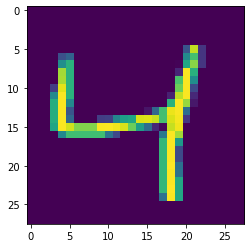

In [8]:
plt.imshow(x_train[2])

In [9]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

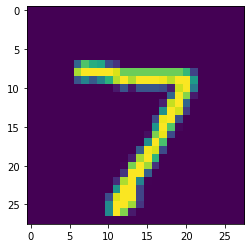

In [10]:
plt.imshow(x_test[0])

In [11]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

In [12]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)


In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation = 'softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs=1,batch_size=32)

1875/1875 [==============================] - 178s 95ms/step - loss: 0.1154 - accuracy: 0.9660 - val_loss: 0.0697 - val_accuracy: 0.9775


In [19]:
metrics= model.evaluate(x_test,y_test,verbose=0)
print(metrics)

[0.06969170272350311, 0.9775000214576721]


In [20]:
prediction = model.predict(x_test[:4])
print(prediction)

[[3.3368715e-07 2.8558070e-10 2.9481564e-07 5.7716704e-07 3.8470557e-08
  3.5787512e-08 2.1778582e-12 9.9998200e-01 2.7946080e-06 1.3891684e-05]
 [4.4363729e-05 6.3388829e-06 9.9990284e-01 9.9102110e-08 7.5369394e-10
  2.9037545e-10 4.3312411e-05 3.4019647e-09 3.0413103e-06 4.0210309e-12]
 [8.4616522e-07 9.8831230e-01 3.9515150e-04 6.1930274e-07 1.0813128e-02
  5.2794701e-05 5.1934620e-07 9.6702315e-05 3.2155871e-04 6.4595756e-06]
 [9.9777323e-01 1.7825867e-09 5.9881572e-06 2.4472721e-08 5.0562294e-06
  9.9832982e-07 5.9432263e-04 8.5056087e-07 1.2446315e-05 1.6069307e-03]]


In [21]:
model.save('mnistCNN.h5')

In [22]:
!tar -zcvf handwritten-digit-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [23]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 9.9 MB/s eta 0:00:01


In [24]:
!pip install ibm_watson_machine_learning

In [57]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "8K3z_sRYe7Lr2xIlMydhUGxuadjSfV6t-7hlptbR11s4"
}
client = APIClient(wml_credentials)

In [58]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [59]:
space_uid=guid_from_space_name(client,'digitrecognizer')
print("Space UID = "+space_uid)

Space UID = bd8ccfd5-ca4e-42a5-83f3-4f0029b6850f


In [60]:
ls -1

handwritten-digit-model_new.tgz
mnistCNN.h5


In [61]:
client.set.default_space(space_uid)

'SUCCESS'

In [63]:
client.software_specifications.list(limit=500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [64]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.8")
software_spec_uid

'fe185c44-9a99-5425-986b-59bd1d2eda46'